In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

### Import All the data generated after Feature Engineering

In [4]:
data_dir = r"C:\Self-Learning\Kaggle\housePricePrediction\data"

In [61]:
train = pd.read_csv(os.path.join(data_dir, 'train_new.csv'))

In [62]:
test = pd.read_csv(os.path.join(data_dir, 'test_new.csv'))

In [63]:
print(train.shape)
print(test.shape)

(1460, 216)
(1459, 215)


In [64]:
train.head()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Id,SalePrice
0,0,-0.358406,-0.217879,0.646183,-0.507284,0.529034,0.581145,-0.293025,-0.934165,-0.443078,...,2,6,0,3,3,5,5,3,1,208500
1,1,0.159847,-0.072044,-0.063185,2.188279,-0.567016,1.178255,-0.293025,-0.629284,0.477463,...,0,6,0,4,5,5,5,3,2,181500
2,2,-0.254756,0.137197,0.646183,-0.507284,0.338903,0.098189,-0.293025,-0.287999,-0.297968,...,2,6,0,3,5,5,5,3,3,223500
3,3,-0.531157,-0.078385,0.646183,-0.507284,-0.567016,-0.494529,-0.293025,-0.046824,-0.669812,...,0,6,2,3,2,5,5,3,4,140000
4,4,0.298048,0.518903,1.355551,-0.507284,1.390216,0.469187,-0.293025,-0.160586,0.212184,...,2,6,0,3,5,5,5,3,5,250000


In [65]:
test.head()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Id
0,1460,0.159847,0.184371,-0.772552,0.391237,-0.567016,0.058675,0.558290,-0.661137,-0.384127,...,3,5,3,4,4,3,5,5,3,1461
1,1461,0.194397,0.519791,-0.063185,0.391237,0.036930,1.057516,-0.293025,-0.351705,0.629375,...,3,0,6,4,3,3,5,5,3,1462
2,1462,-0.047454,0.464374,-0.772552,-0.507284,-0.567016,0.767742,-0.293025,-0.963743,-0.279829,...,3,2,6,2,4,5,5,5,3,1463
3,1463,0.090747,-0.024109,-0.063185,0.391237,-0.455174,0.352839,-0.293025,-0.538274,-0.284364,...,3,2,6,0,3,2,5,5,3,1464
4,1464,-1.118511,-0.654748,1.355551,-0.507284,-0.567016,-0.391353,-0.293025,1.038461,0.518275,...,3,0,6,0,3,3,5,5,3,1465


In [66]:
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)

In [67]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Id,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.043903,0.044221,0.007266,0.009673,0.009625,0.005198,-0.017830,0.015154,0.013632,0.007762,...,3.150000,5.586986,1.538356,3.339726,3.087671,4.716438,4.763014,2.991096,730.500000,180921.195890
std,1.080547,1.265751,0.981053,0.999874,1.010667,1.001252,0.953705,1.005350,0.994695,0.985452,...,2.251517,1.200854,1.739524,0.830161,1.167523,0.898787,0.802670,0.140703,421.610009,79442.502883
min,-1.878616,-1.124590,-3.610024,-4.101368,-0.567016,-0.968705,-0.293025,-1.275450,-2.383923,-2.104493,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,-0.531157,-0.331566,-0.772552,-0.507284,-0.567016,-0.968705,-0.293025,-0.768073,-0.579685,-0.707584,...,1.000000,6.000000,0.000000,3.000000,2.000000,5.000000,5.000000,3.000000,365.750000,129975.000000
50%,-0.082005,-0.087452,-0.063185,-0.507284,-0.567016,-0.126824,-0.293025,-0.189026,-0.135853,-0.185018,...,2.000000,6.000000,0.000000,4.000000,3.000000,5.000000,5.000000,3.000000,730.500000,163000.000000
75%,0.505349,0.181772,0.646183,0.391237,0.351485,0.594866,-0.293025,0.562938,0.559654,0.590546,...,6.000000,6.000000,4.000000,4.000000,3.000000,5.000000,5.000000,3.000000,1095.250000,214000.000000
max,11.415728,26.006354,2.774287,3.086800,8.380332,11.421314,8.421127,4.039493,11.469541,9.004498,...,6.000000,6.000000,4.000000,4.000000,5.000000,5.000000,5.000000,3.000000,1460.000000,755000.000000


#### Visualizing Important features Vs SalePrice

Text(0, 0.5, 'SalePrice')

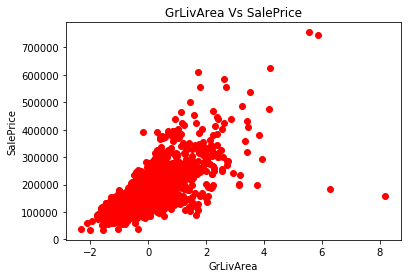

In [9]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='r')
plt.title('GrLivArea Vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [68]:

upperLimit = np.percentile(train['SalePrice'].values, 99.5)
upperLimit

527331.9149999974

In [69]:
# train['GrLivArea'].ix[train['GrLivArea']>upperLimit] = upperLimit
train['SalePrice'].ix[train['SalePrice']>upperLimit] = upperLimit

Text(0, 0.5, 'SalePrice')

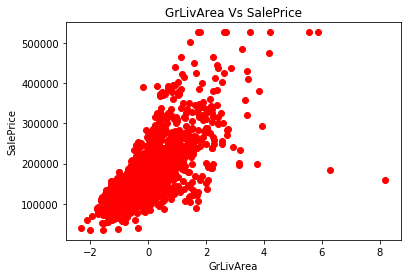

In [70]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='r')
plt.title('GrLivArea Vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [71]:
# Since 'GrLivArea' containes outliers we will try to reduce the impact of outliers

upperLimitGrLiv = np.percentile(train['GrLivArea'].values, 99.5)
upperLimitGrLiv

3.816277036138384

In [72]:
train['GrLivArea'].ix[train['GrLivArea']>upperLimitGrLiv] = upperLimitGrLiv

Text(0, 0.5, 'SalePrice')

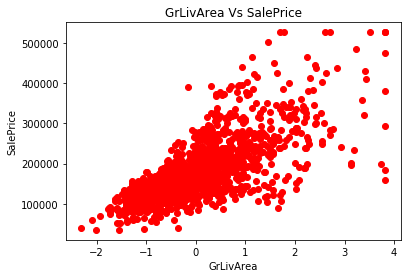

In [73]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='r')
plt.title('GrLivArea Vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [74]:
corr = train.corr()['SalePrice']

In [75]:
corr

LotFrontage    0.287832
LotArea        0.267056
OverallQual    0.802340
OverallCond   -0.079075
MasVnrArea     0.468733
                 ...   
GarageQual     0.211412
GarageCond     0.253787
PoolQC        -0.089614
Id            -0.025960
SalePrice      1.000000
Name: SalePrice, Length: 215, dtype: float64

In [76]:
# corr = corr.apply(lambda x: abs(x))
# corr[np.argsort(corr, axis=0)][::-1][:10]
print(corr[np.argsort(corr, axis=0)[::-1]])

Id                 -0.025960
OverallQual         0.802340
GrLivArea           0.720586
GarageCars          0.652863
GarageArea          0.635267
                      ...   
BsmtFinType2        0.074317
GarageFinish_Unf   -0.420049
HeatingQC          -0.408943
ExterCond           0.121556
HouseStyle          0.181464
Name: SalePrice, Length: 215, dtype: float64


In [77]:
threshold = 0.5
important_features = corr[abs(corr) > threshold][corr != 1.0]
important_features = important_features[important_features.argsort()[::-1]]

In [78]:
important_features

OverallQual         0.802340
GrLivArea           0.720586
GarageCars          0.652863
GarageArea          0.635267
TotalBsmtSF         0.617219
1stFlrSF            0.609000
FullBath            0.565595
TotRmsAbvGrd        0.537596
Foundation_PConc    0.508498
KitchenQual        -0.594020
BsmtQual           -0.601392
ExterQual          -0.644598
Name: SalePrice, dtype: float64

In [79]:
important_features_names = important_features.index

In [80]:
important_features_names

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Foundation_PConc',
       'KitchenQual', 'BsmtQual', 'ExterQual'],
      dtype='object')

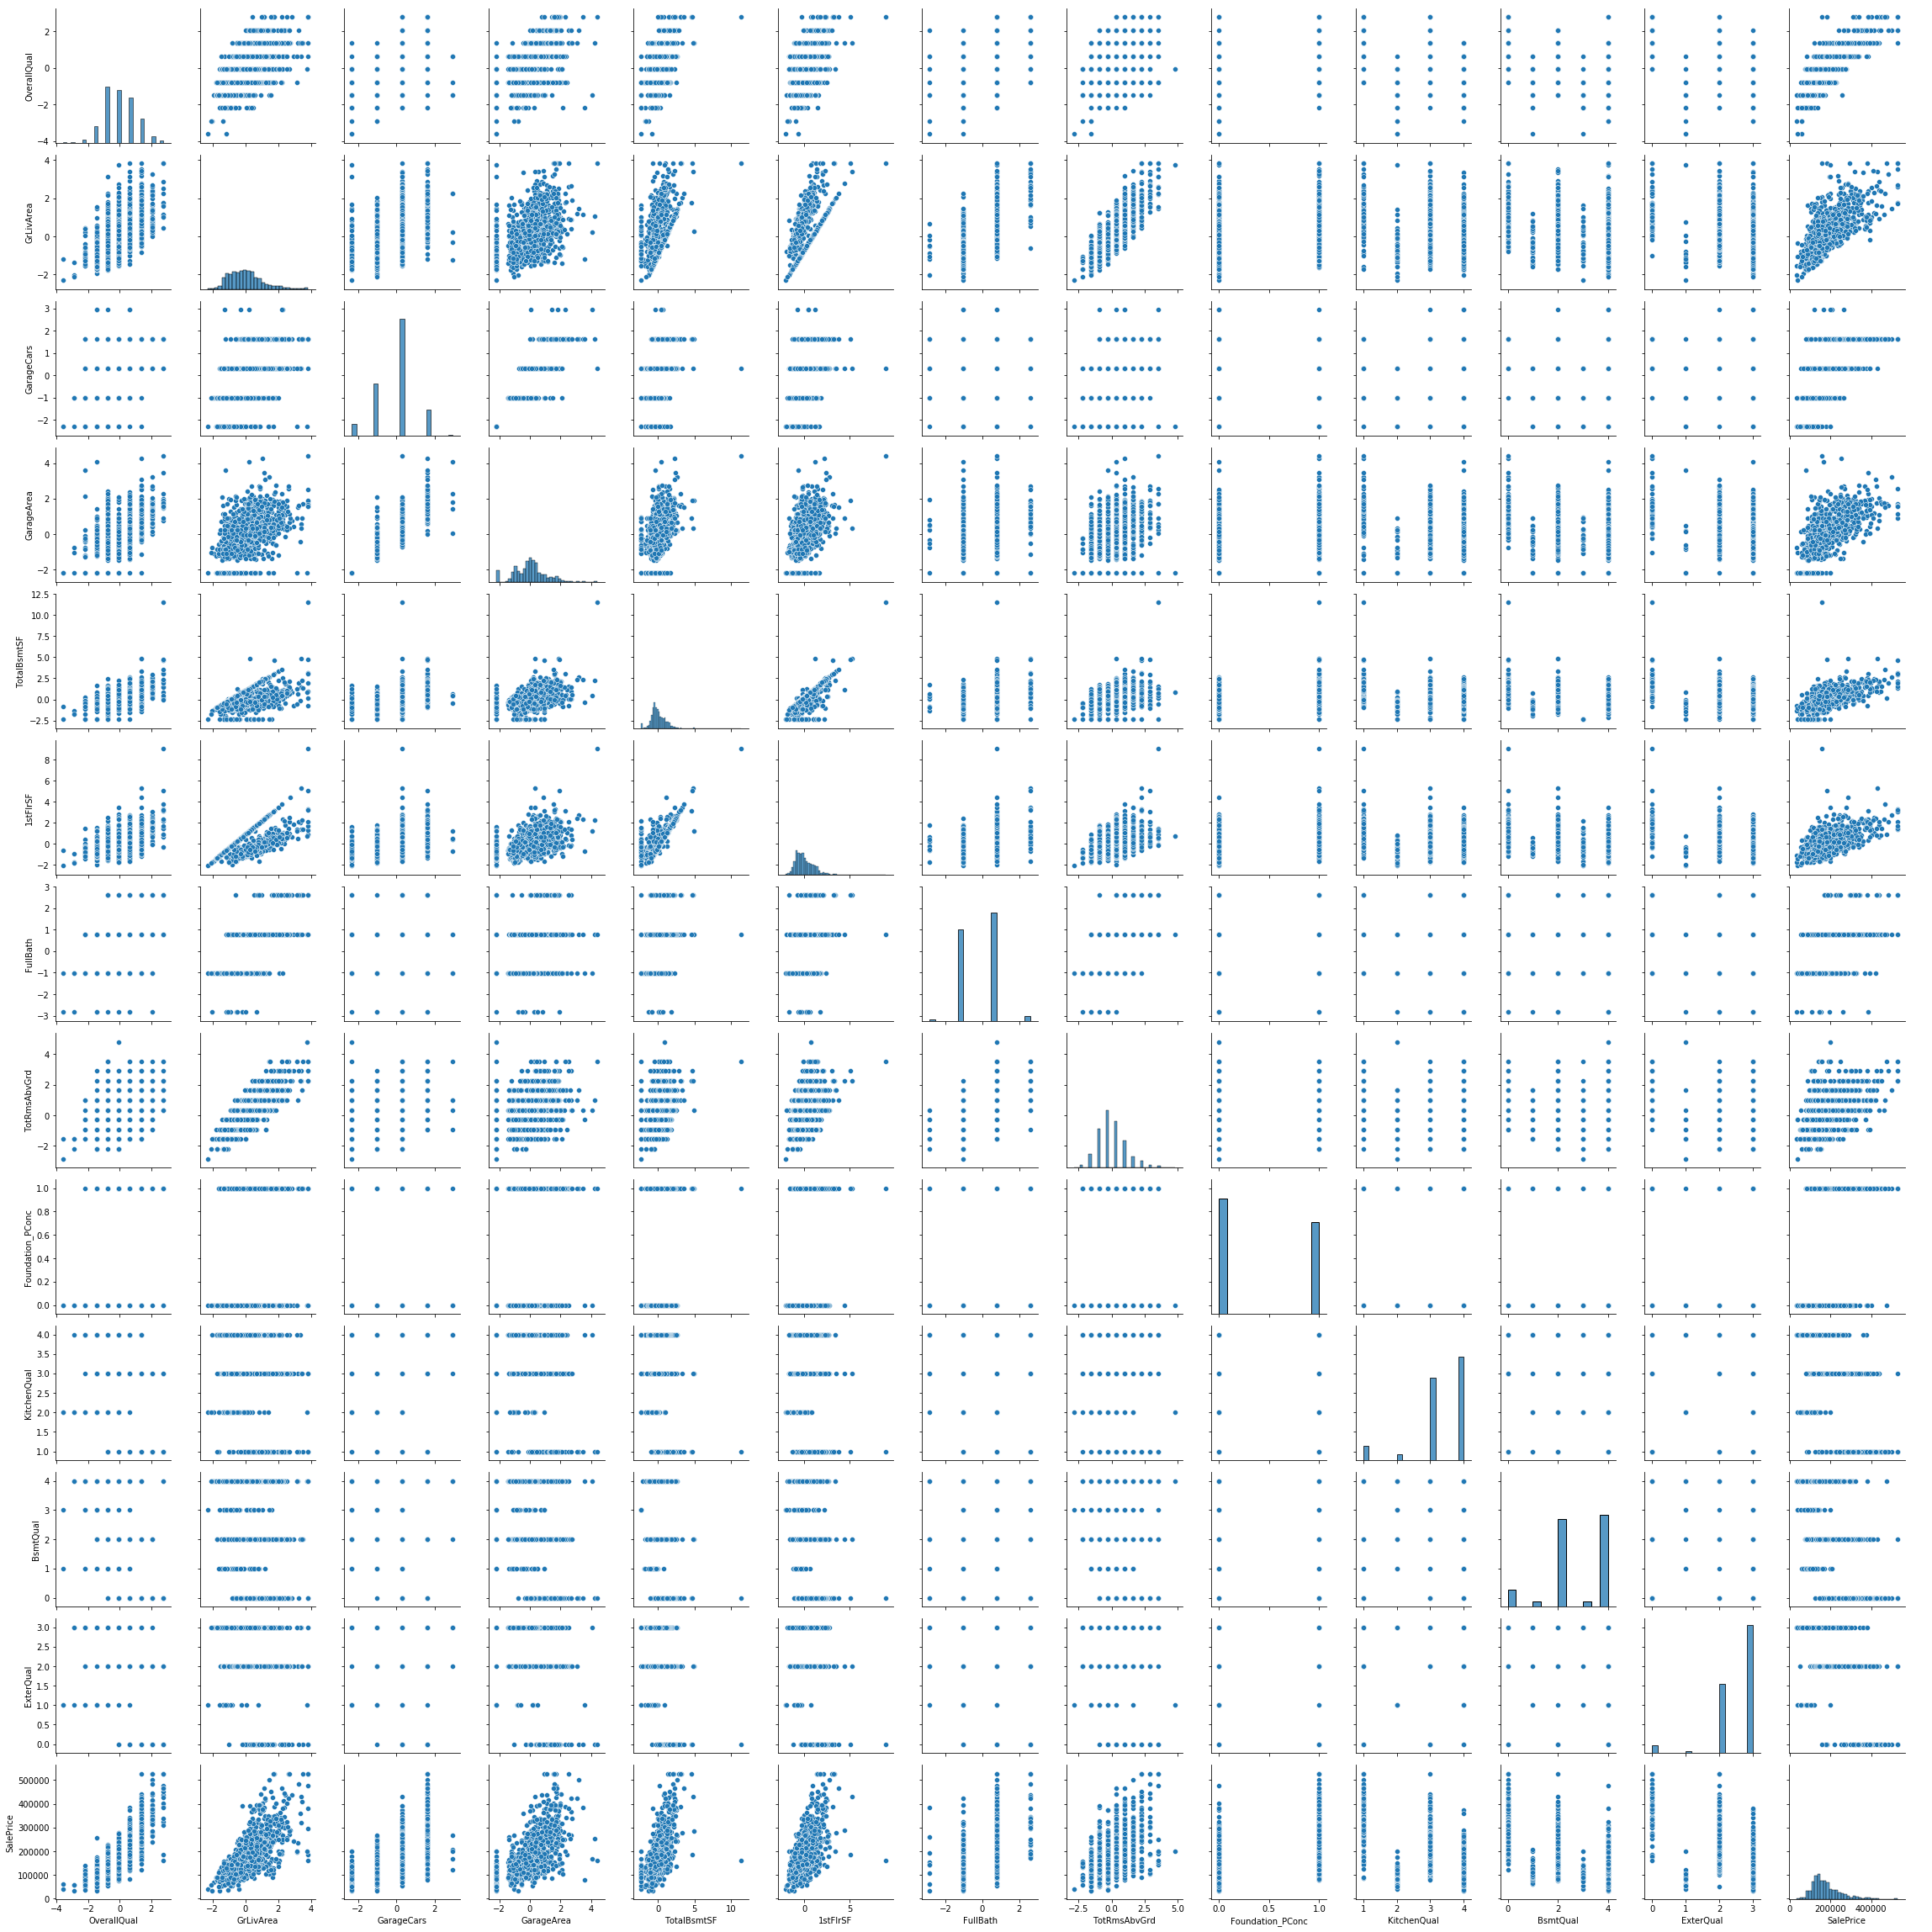

In [25]:
plot_features = list(important_features_names)+["SalePrice"]
sns.pairplot(train[plot_features])

Find the most important feature as independent variable w.r.t to target varibale (i.e. <b>SalePrice</b>)<br>
Most Correlated feature : <b>OverallQual or GrLivArea</b>

### Simple Linear Regression
Find the most correlate variable and predict target variable using Simple Linear Regession

In [81]:
# OverallQual is a categorical variable. We will select countinous variable "GrLivArea" to predict SalePrice

X = train['GrLivArea'].values
X = X.reshape(-1,1)
X.shape

(1460, 1)

In [82]:
X

array([[ 0.41354722],
       [-0.47189065],
       [ 0.56375543],
       ...,
       [ 1.65869422],
       [-0.83555263],
       [-0.48374919]])

In [83]:
y = train['SalePrice'].values
y.shape

(1460,)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression(fit_intercept=True)

In [86]:
slr.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = slr.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

In [101]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [102]:
rmsle(y_test, y_pred)

51751.387245633014

Text(0, 0.5, 'SalePrice')

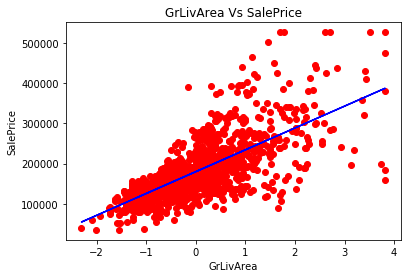

In [103]:
plt.scatter(X_train, y_train, color='r')
plt.plot(X_train, slr.predict(X_train), color='b')
plt.title('GrLivArea Vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

## Multivariate Regression

#### All Features

In [104]:
y = train['SalePrice'].values
train = train.drop(['SalePrice', 'Id'], axis=1)
X = train.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [105]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = lr.predict(X_test)

In [113]:
rmsle(y_test, y_pred)

2892923716430509.0

In [119]:
print("Prediction: ", pd.Series(y_pred).shape)
print("True Values: ", pd.Series(y_test).shape)

Prediction:  (292,)
True Values:  (292,)


In [124]:
df = pd.concat([pd.Series(y_test), pd.Series(y_pred)], axis=1)
df.columns = ['True Values', 'Predictions']

In [135]:
prediction = df['Predictions']
prediction = prediction[np.argsort(prediction, axis=0)[::-1]]

In [146]:
lowerLimit = np.percentile(prediction, 5)
upperLimit = np.percentile(prediction, 95)

In [147]:
df['Predictions'].ix[df['Predictions']<lowerLimit] = lowerLimit
df['Predictions'].ix[df['Predictions']>upperLimit] = upperLimit

#### Visualize our predicted results

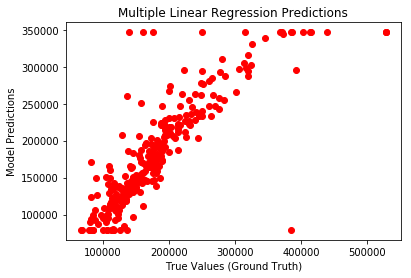

In [148]:
# ax = plt.gca()
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.scatter(df['True Values'], df['Predictions'], color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')
plt.ticklabel_format(useOffset=False)
plt.draw()

#### Important Features

In [49]:
X = train[important_features_names].values
X

array([[ 0.6461834 ,  0.41354722,  0.30703976, ...,  3.        ,
         2.        ,  2.        ],
       [-0.06318454, -0.47189065,  0.30703976, ...,  4.        ,
         2.        ,  3.        ],
       [ 0.6461834 ,  0.56375543,  0.30703976, ...,  3.        ,
         2.        ,  2.        ],
       ...,
       [ 0.6461834 ,  1.65869422, -1.00518435, ...,  3.        ,
         4.        ,  0.        ],
       [-0.77255247, -0.83555263, -1.00518435, ...,  3.        ,
         4.        ,  3.        ],
       [-0.77255247, -0.48374919, -1.00518435, ...,  4.        ,
         4.        ,  2.        ]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [52]:
imp_lr = LinearRegression(fit_intercept=True)

In [53]:
imp_lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_test_pred = imp_lr.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_test_pred)
mse

1675517607.6138234

### Load Data From Feature Engineering 2.0

In [23]:
X = pd.read_csv(os.path.join(data_dir, 'train_prepared_features.csv'))
X_test = pd.read_csv(os.path.join(data_dir, 'test_prepared_features.csv'))


In [37]:
y = pd.read_csv(os.path.join(data_dir, 'y_train.csv'), header=None).values
test_ids = pd.read_csv(os.path.join(data_dir, 'test_ids.csv'),  header=None).values

In [38]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(test_ids.shape)

(1458, 304)
(1458, 1)
(1459, 304)
(1459, 1)


In [12]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.499672,18.144573,13.833055,7,3.991517,2003,2003,19.433173,144.117849,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4.249693,20.673626,14.117918,6,6.000033,1976,1976,0.000000,181.719167,0.0,...,0,0,0,1,0,0,0,0,1,0
2,6.499672,18.668047,14.476513,7,3.991517,2001,2002,17.768839,110.441024,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6.862540,17.249651,14.106197,7,3.991517,1915,1970,0.000000,61.795310,0.0,...,0,0,0,1,1,0,0,0,0,0
4,6.499672,21.314283,15.022008,8,3.991517,2000,2000,25.404162,136.624588,0.0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.249693,20.673626,14.550687,5,4.679501,1961,1961,0.000000,107.505902,7.760722,...,0,0,0,1,0,0,0,0,1,0
1,4.249693,20.834997,15.023149,6,4.679501,1958,1958,14.642918,174.393626,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,6.499672,19.687483,14.950918,5,3.991517,1997,1998,0.000000,156.263679,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,6.499672,20.348385,14.204772,6,4.679501,1998,1998,6.157403,128.653460,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,8.231644,13.949261,12.696875,8,3.991517,1992,1992,0.000000,71.179541,0.000000,...,0,0,0,1,0,0,0,0,1,0


### Cross Valdation and Metric Evaluation

In [40]:
from sklearn.metrics import mean_squared_error 
from sklearn. model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [41]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [42]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

### LassoCV Model

In [43]:
from sklearn.linear_model import LassoCV
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter = 1e7, alphas = alphas2, random_state = 42, cv = kfolds))

### RidgeCV

In [44]:
from sklearn.linear_model import RidgeCV
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_alt, cv=kfolds))

### ElasticNetCV Model

In [45]:
from sklearn.linear_model import ElasticNetCV
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio))

In [46]:
from datetime import datetime

In [47]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Ridge: 0.1081 (0.0162)
 2022-04-19 18:12:06.528791
LASSO: 0.1065 (0.0161)
 2022-04-19 18:12:13.040840
elastic net: 0.1067 (0.0161)
 2022-04-19 18:12:38.629962


### Predict 

In [48]:
print('START Fit')

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

START Fit
elasticnet
Lasso
Ridge


### Blend Models

In [67]:
def blend_models_predict(X):
    return ((0.4 * elastic_model_full_data.predict(X)) + \
            (0.2 * lasso_model_full_data.predict(X)) + \
            (0.4 * ridge_model_full_data.predict(X)[:, 0]))

In [68]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.09624111606162275


In [70]:
y_test_pred = blend_models_predict(X_test)

In [71]:
y_test_pred = np.expm1(y_test_pred)

In [77]:
submisson = pd.DataFrame(columns=['Id', 'SalePrice'])
submisson['Id'] = test_ids[:,0]
submisson['SalePrice'] = y_test_pred

In [78]:
submisson.to_csv(r"C:\Self-Learning\Kaggle\housePricePrediction\submission.csv", index=False)